In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [58]:
df = pd.read_csv("kc-house-data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##  1 задача

### 1.2. Изучите стоимости недвижимости

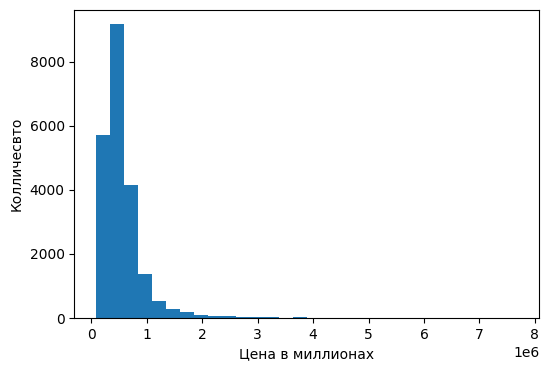

In [4]:
plt.figure(figsize=(6,4))

plt.hist(df['price'], bins=30)
plt.xlabel('Цена в миллионах')
plt.ylabel('Колличесвто')
plt.show()

### Видим что цена в диапазоне от 1 до 4 мл

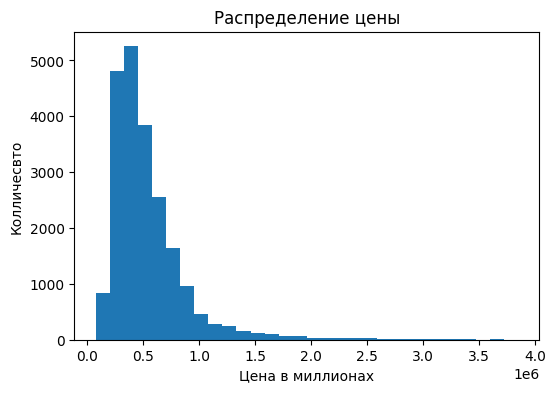

In [5]:
data = df[df['price'] < 4000000] # фильтруем выбросы

plt.figure(figsize=(6,4))

plt.hist(data['price'], bins=30)
plt.title('Распределение цены')
plt.xlabel('Цена в миллионах')
plt.ylabel('Колличесвто')
plt.show()

### Видим что цена в среднем от 250000 до 1 миллиона

### 1.3. Изучите распределение квадратуры жилой

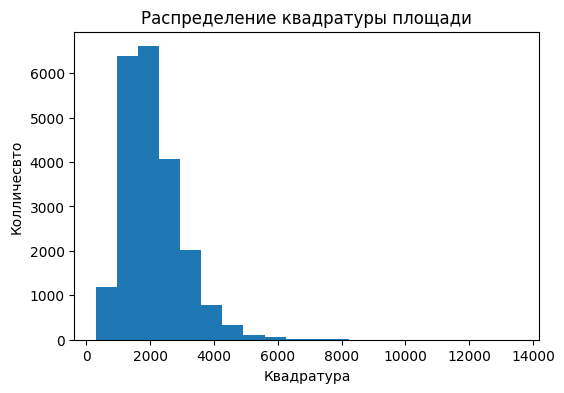

In [6]:
plt.figure(figsize=(6,4))

plt.hist(data['sqft_living'], bins=20)
plt.title('Распределение квадратуры площади')
plt.xlabel('Квадратура')
plt.ylabel('Колличесвто')
plt.show()

### Видим что средняя жилая плошадья в домах от 1000 до 1750

### 1.4. Изучите распределение года постройки

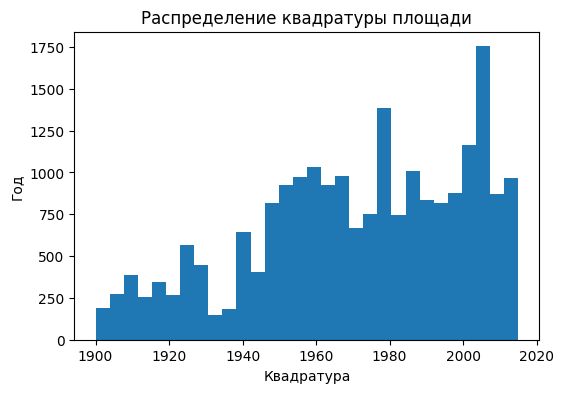

In [7]:
plt.figure(figsize=(6,4))

plt.hist(data['yr_built'], bins=30)
plt.title('Распределение квадратуры площади')
plt.xlabel('Квадратура')
plt.ylabel('Год')
plt.show()

### Видим что активная застройка началась с 1945. (Возможно как то связано со 2 мировой)

##  2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную

In [38]:
waterfront_data = df.groupby('waterfront').size().reset_index()
waterfront_data.rename(columns={0:'Колличество домов'})

,waterfront,Колличество домов
0,0,21450
1,1,163


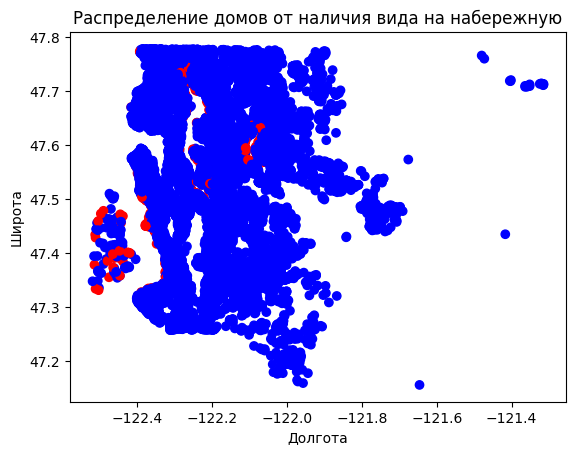

In [26]:
plt.scatter(df['long'], df['lat'], c=df['waterfront'].map({0: 'b', 1: 'r'}))
plt.xlabel('Долгота')  
plt.ylabel('Широта')  
plt.title('Распределение домов от наличия вида на набережную');

### Видим что домов с сидом на набережную не так много. Так же видим что дольшее их колличество на острове 

### 2.2. Изучите распределение этажей домов

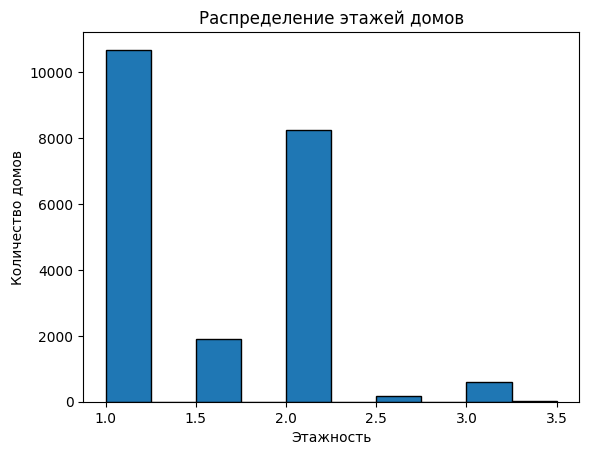

In [39]:
plt.hist(df['floors'], bins=10, edgecolor='black')  
plt.xlabel('Этажность')  
plt.ylabel('Количество домов')  
plt.title('Распределение этажей домов')   
plt.show()

### Видим что больше всего домов с 1 и 2 этажом

### 2.3. Изучите распределение состояния домов

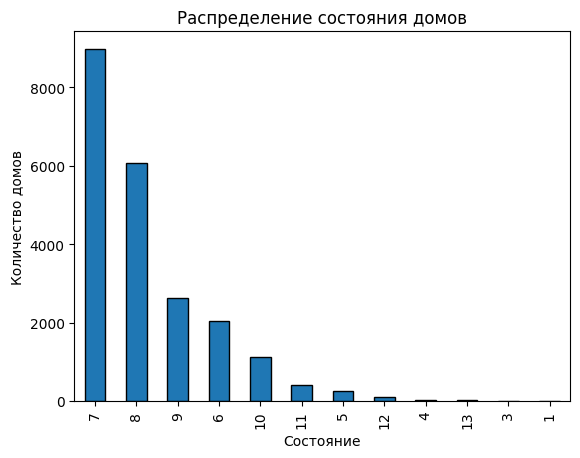

In [40]:
count_by_state = df['grade'].value_counts()

count_by_state.plot(kind='bar', edgecolor='black')  

plt.xlabel('Состояние')  
plt.ylabel('Количество домов')  
plt.title('Распределение состояния домов')  

plt.show()  

### Видим что больше всего домов с качеством 7 и 8

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости на основе матрицы корреляции.

In [69]:
columns_to_convert = df.select_dtypes(include=['int']).columns.tolist()

df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype(float))

data3 = df.select_dtypes(include=["float64","float16","float32"])
data3 = data3.drop('id', axis=1).drop('zipcode', axis=1)
correlation_matrix = data3.corr()

# correlation_matrix

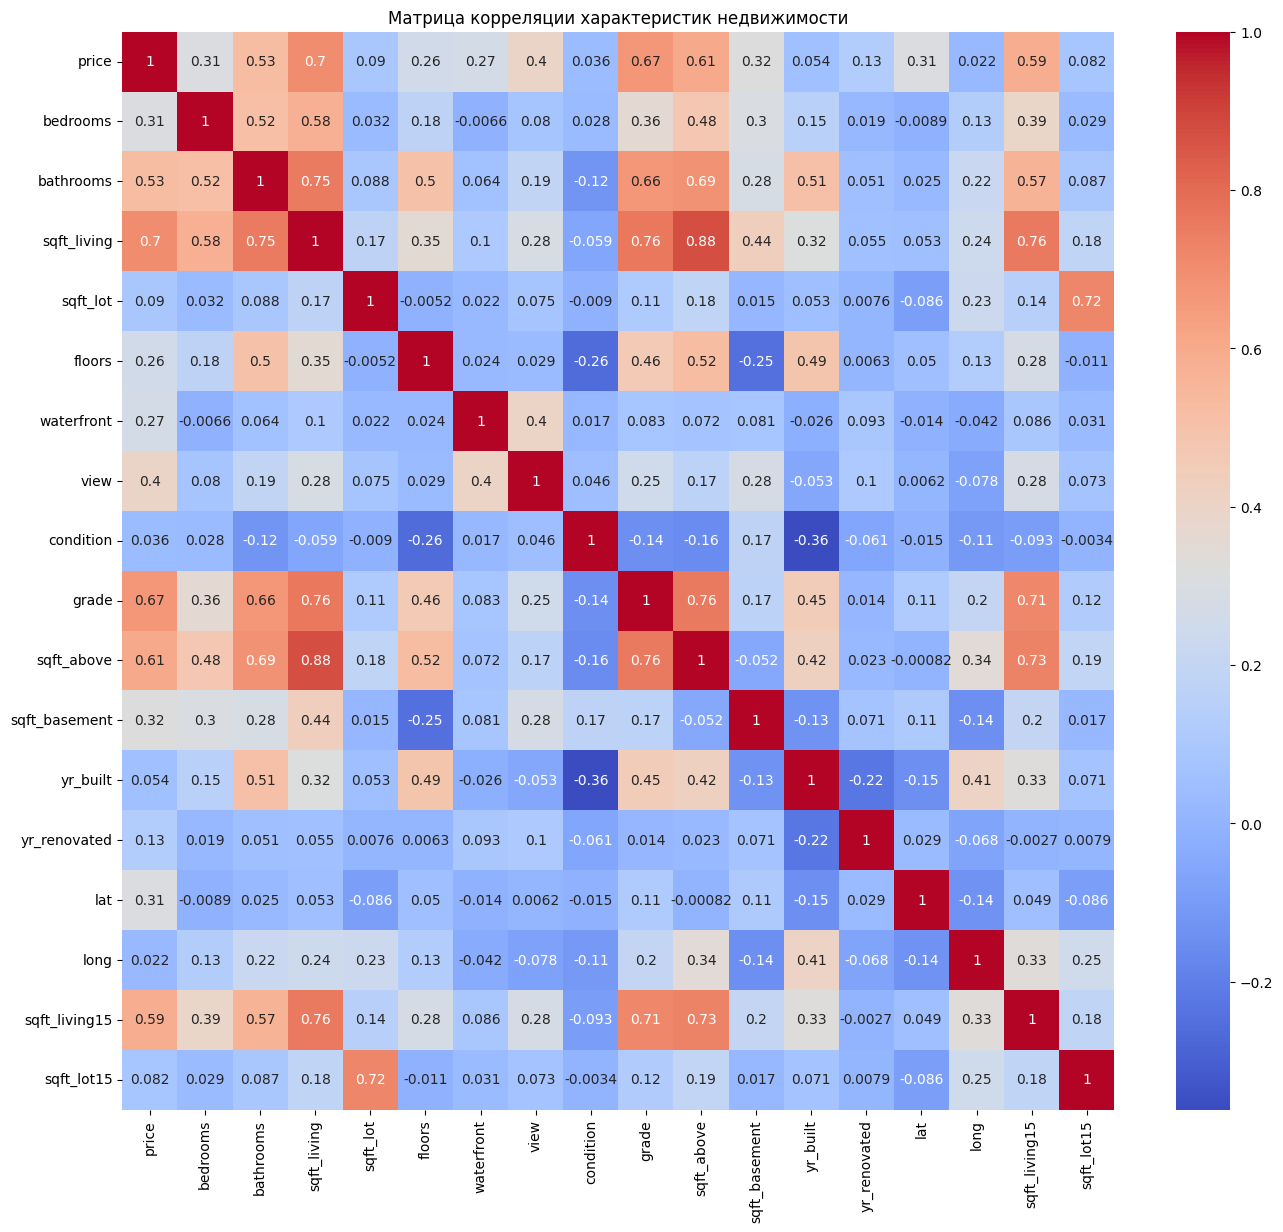

In [70]:
plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Матрица корреляции характеристик недвижимости')  
 
plt.show() 

### Видим что самое большое влияние на цену  у нас он жилой площади, квадратуры жилой площади и качесвтво дома